## OSIRIS Grid File data import
To import data using `osiris_utils` you use the class defined in `osiris_utils.data`, `OsirisGridFile`.

In [27]:
import osiris_utils as ou
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

It reads the data from the grid file, as well as its attributes. It reads 1D, 2D and 3D data.

In [3]:
data_1D = ou.OsirisGridFile('files/MS/PHA/x1/electrons/x1-electrons-000001.h5')
data_2D = ou.OsirisGridFile('files/MS/PHA/x1x2/electrons/x1x2-electrons-000001.h5')
data_3D = ou.OsirisGridFile('files/MS/PHA/x1x2gamma/electrons/x1x2gamma-electrons-000001.h5')

In [7]:
print("1D:")
print(data_1D)
print("*"*50)
print("2D:")
print(data_2D)
print("*"*50)
print("3D:")
print(data_3D)

1D:
electrons x_1
Time: [0.001 1 / \omega_p], dt = 0.001
Iteration: 1
Grid: [-10.  10.]
dx: 0.2
Dimensions: 2D
**************************************************
2D:
electrons x_1x_2
Time: [0.001 1 / \omega_p], dt = 0.001
Iteration: 1
Grid: [[ -9.   9.]
 [-10.  10.]]
dx: [0.2 0.2]
Dimensions: 2D
**************************************************
3D:
electrons x_1x_2\gamma
Time: [0.001 1 / \omega_p], dt = 0.001
Iteration: 1
Grid: [[  1.   5.]
 [ -9.   9.]
 [-10.  10.]]
dx: [0.05 0.2  0.2 ]
Dimensions: 2D


`OsirisGridFile` has the following attributes:
- filename - the path to the HDF5 file
    - str

- file - the HDF5 file
    - h5py.File

- verbose - if True, the class will print messages
    - bool

- dt - the time step
    - float

- dim - the number of dimensions
    - int

- time - the time and its units
    - list [time, units]
    - list [float, str]

- iter - the iteration number
    - int

- name - the name of the data
    - str

- type - the type of data
    - str

- grid - the grid data ((x1.min, x1.max), (x2.min, x2.max), (x3.min, x3.max))
    - numpy.ndarray

- nx - the number of grid points (nx1, nx2, nx3)
    - numpy.ndarray

- dx - the grid spacing (dx1, dx2, dx3)
    - numpy.ndarray

- axis - the axis data [(name_x1, units_x1, long_name_x1, type_x1), ...]
    - list of dictionaries

- data: the data (numpy array) with shape (nx1, nx2, nx3) (Transpose to use `plt.imshow`)
    - numpy.ndarray

- units - the units of the data
    - str

- label - the label of the data (LaTeX formatted)

# Plot the data

1D:

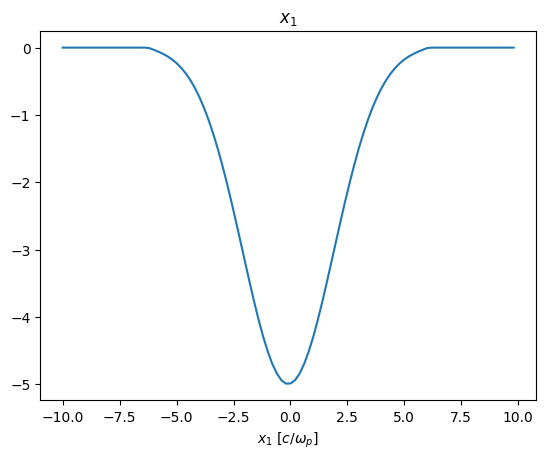

In [22]:
plt.plot(data_1D.x, data_1D.data)
plt.xlabel(data_1D.axis[0]["plot_label"])
plt.title(r"$ %s $" % data_1D.name.replace("electrons", ""))
plt.show()

2D:

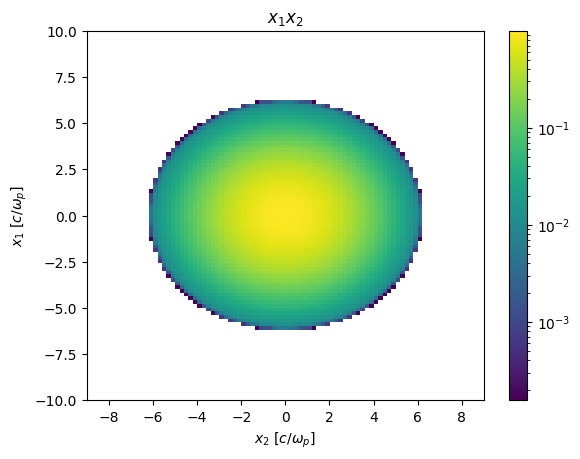

In [35]:
plt.imshow(np.abs(data_2D.data.T), extent=[*data_2D.grid[0], *data_2D.grid[1]], aspect='auto', origin='lower', norm=LogNorm())
plt.xlabel(data_2D.axis[0]["plot_label"])
plt.ylabel(data_2D.axis[1]["plot_label"])
plt.title(r"$ %s $" % data_2D.name.replace("electrons", ""))
plt.colorbar()
plt.show()

3D:

In [59]:
print([data_3D.axis[i]["name"] for i in range(3)])
data_3D.data[0, :, :]

['gamma', 'x2', 'x1']


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(90, 100), dtype=float32)

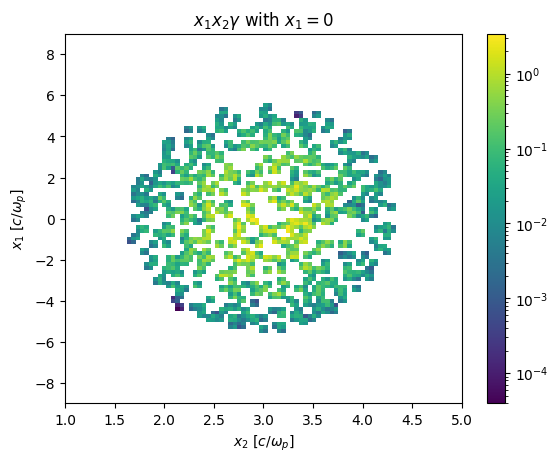

In [61]:
plt.imshow(np.abs(data_3D.data[0, :, :].T), extent=[*data_3D.grid[0], *data_3D.grid[1]], aspect='auto', origin='lower', norm=LogNorm())
plt.xlabel(data_3D.axis[1]["plot_label"])
plt.ylabel(data_3D.axis[2]["plot_label"])
plt.title(r"$ %s $ with $ x_1 = 0 $" % data_3D.name.replace("electrons", ""))
plt.colorbar()
plt.show()